In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv",engine = 'python')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


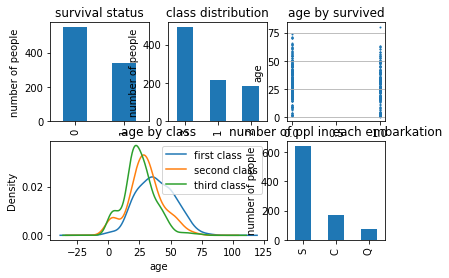

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3), (0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title("survival status")
plt.ylabel("number of people")

plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title("class distribution")
plt.ylabel("number of people")

plt.subplot2grid((2,3), (0,2))
plt.scatter(data_train.Survived, data_train.Age, s=1)
plt.ylabel("age")
plt.grid(b=True, which='major', axis='y')
plt.title("age by survived")

plt.subplot2grid((2,3), (1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.title("age by class")
plt.legend(("first class", "second class", "third class"))

plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.ylabel("number of people")
plt.title("number of ppl in each embarkation")
plt.show()


Around 300 people survived. Lots of people are in the third class. The age ranges are very large on both survived and unsurvided. Most people on second and third class are around 20 years old, while people on the first class are largely around 40. Around 70% of people are on embarkation S, and few people are on C and Q embarkations. 

<Figure size 432x288 with 0 Axes>

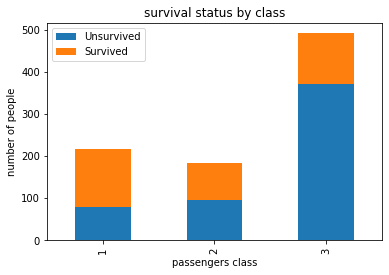

In [5]:
fig = plt.figure()
fig.set(alpha=0.2)
survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
df = pd.DataFrame({'Unsurvived': survived_0, 'Survived': survived_1})
df.plot(kind='bar', stacked=True)
plt.title("survival status by class")
plt.xlabel("passengers class")
plt.ylabel("number of people")
plt.show()

People in the first class have a greater chance to survive

<Figure size 432x288 with 0 Axes>

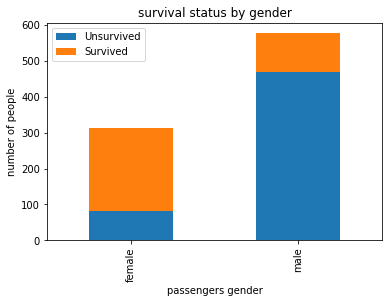

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)
survived_1 = data_train.Sex[data_train.Survived == 1].value_counts()
survived_0 = data_train.Sex[data_train.Survived == 0].value_counts()
df = pd.DataFrame({'Unsurvived': survived_0, 'Survived': survived_1})
df.plot(kind='bar', stacked=True)
plt.title("survival status by gender")
plt.xlabel("passengers gender")
plt.ylabel("number of people")
plt.show()

Female has a greater chance to survive


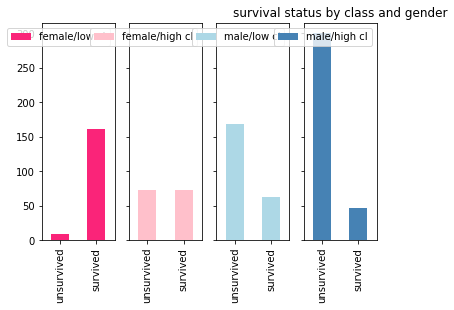

In [7]:
fig = plt.figure()
fig.set(alpha=0.65)

ax1 = fig.add_subplot(141)
# survival status for female at low-level class
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().sort_index().plot(kind='bar', color='#FA2479')
ax1.set_xticklabels(["unsurvived", "survived"])
ax1.legend(["female/low cl"], loc="best")

ax2 = fig.add_subplot(142, sharey=ax1)
# survival status for female at high-level class
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().sort_index().plot(kind='bar', color='pink')
ax2.set_xticklabels(["unsurvived", "survived"])
ax2.legend(["female/high cl"], loc="best")

ax3 = fig.add_subplot(143, sharey=ax1)
# survival status for male at low-level class
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().sort_index().plot(kind='bar', color='lightblue')
ax3.set_xticklabels(["unsurvived", "survived"])
ax3.legend(["male/low cl"], loc="best")

ax4 = fig.add_subplot(144, sharey=ax1)
# survival status for male at high-level class
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().sort_index().plot(kind='bar', color='steelblue')
ax4.set_xticklabels(["unsurvived", "survived"])
ax4.legend(["male/high cl"], loc="best")

plt.title("survival status by class and gender")
plt.show()



<Figure size 432x288 with 0 Axes>

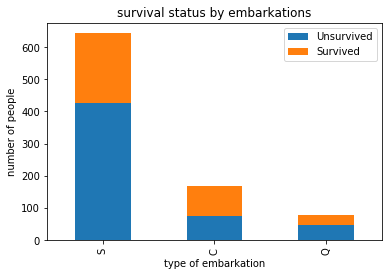

In [8]:
fig = plt.figure()
fig.set(alpha=0.65)

survival_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
survival_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Unsurvived': survival_0,'Survived': survival_1})
df.plot(kind='bar', stacked=True)
plt.xlabel("type of embarkation")
plt.ylabel("number of people")
plt.title("survival status by embarkations")

plt.show()

In [10]:
sib = data_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(sib.count()['PassengerId'])
print(df)

par = data_train.groupby(['Parch', 'Survived'])
df = pd.DataFrame(par.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


There is no strong correlations between number of siblings/parents, childs and survived

Because there are only 204 values on the "cabin" part, let's see it's distribution first.

In [11]:
data_train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
F2             3
D              3
C22 C26        3
E44            2
E67            2
E33            2
D20            2
D35            2
B35            2
F G73          2
B77            2
C2             2
E24            2
B5             2
E121           2
C125           2
C65            2
B58 B60        2
D26            2
C126           2
B51 B53 B55    2
F4             2
B49            2
D17            2
C124           2
              ..
B82 B84        1
C70            1
C82            1
C85            1
B30            1
E34            1
C47            1
C30            1
D45            1
A23            1
B38            1
B69            1
C101           1
T              1
E38            1
C118           1
E50            1
F E69          1
C7             1
C45            1
A19            1
D19            1
D10 D12        1
D21            1
B3             1
C87            1
A14            1
A24           

<Figure size 432x288 with 0 Axes>

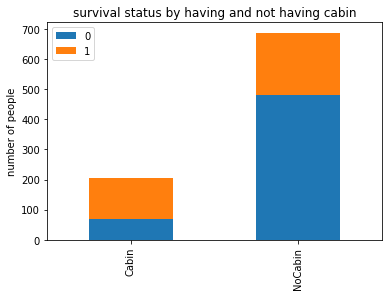

In [12]:
fig = plt.figure()
fig.set(alpha=0.65)

null = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
not_null = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({'Cabin': not_null, 'NoCabin': null}).transpose()
df.plot(kind='bar', stacked=True)
plt.ylabel("number of people")
plt.title("survival status by having and not having cabin")
plt.show()

People having cabins seem to have a greater chance to survive

Because there are some missing values in "age" and "cabin" part, below I used Ramdom Forest in scikit-learn to fit the data of missing age and cabin.

In [9]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_age(df):
    age_df = df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    # our target variable
    y = known_age[:, 0]
    x = known_age[:, 1:]
    rfr = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=2000)
    rfr.fit(x,y)
    
    predict_age = rfr.predict(unknown_age[:, 1::])
    
    #fit our prodicted ages into the NAN values
    df.loc[df.Age.isnull(), 'Age'] = predict_age
    return df, rfr

def set_missing_cabin(df):
    df.loc[df.Cabin.notnull(), 'Cabin' ] = "Yes"
    df.loc[df.Cabin.isnull(), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_age(data_train)
data_train = set_missing_cabin(data_train)

data_train.head(10)
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


While doing analysis using logistic regression, the inputted factors require numerial. Therefore, we can do some feature factorization by using pd.get_dummies() function.

In [10]:
dummies_Cabin = pd.get_dummies(data_train.Cabin, prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train.Embarked, prefix='Embarked')
dummies_Pclass = pd.get_dummies(data_train.Pclass, prefix='Pclass')
dummies_Sex = pd.get_dummies(data_train.Sex, prefix='Sex')
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Pclass, dummies_Sex], axis=1)
df.drop(['Name','Cabin', 'Embarked', 'Pclass', 'Sex', 'Ticket'], axis = 1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,0,1,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,0,1,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1,1,0
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,0,1,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,0,1,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,0,1,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,1,0,0,0,1
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,0,1,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,0,0,1,1,0
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,0,1,0,1,0


We can see that the values of 'Age' and 'Fare' have a great variation. Therefore, we can do some scaling first by using preprocessing in scikit-learn.

In [16]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_parm = scaler.fit(df['Age'].values.reshape(-1,1))
df['scaled_Age'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_parm)
fare_scale_parm = scaler.fit(df['Fare'].values.reshape(-1,1))
df['scaled_Fare'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_parm)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,scaled_Age,scaled_Fare
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1,-0.561374,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0,0.613191,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,-0.267732,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,0,1,0,0.392960,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1,0.392960,-0.486337


In [17]:
from sklearn import linear_model
train_df = df.filter(regex='Survived|scaled_.*|SibSp|Parch|Cabin_.*|Embarked_.*|Pclass_.*|Sex_.*')
train_np = train_df.values
y = train_np[:,0]
x = train_np[:,1:]
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [19]:
data_test = pd.read_csv("test.csv",engine = 'python')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
data_test.loc[data_test['Fare'].isnull(), 'Fare'] = 0
temp_df = data_test[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
# fit the unknown age
null_age = temp_df[temp_df['Age'].isnull()].values
X = null_age[:,1::]
predicted_age = rfr.predict(X)
data_test.loc[data_test['Age'].isnull(), 'Age'] = predicted_age
# reset the cabin values
data_test = set_missing_cabin(data_test)
# convert the categorical data into numerial 
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix='Embarked')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix='Pclass')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix='Sex')
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Pclass, dummies_Sex], axis=1)
df_test.drop(['Name','Cabin', 'Embarked', 'Pclass', 'Sex', 'Ticket'], axis=1, inplace=True)
df_test['scaled_Age'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_parm)
df_test['scaled_Fare'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_parm)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,scaled_Age,scaled_Fare
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,0,1,0,1,0.307528,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1,1,0,1.256248,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,0,1,2.394712,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,0,1,0,1,-0.261704,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1,1,0,-0.641192,-0.416740


In [22]:
test = df_test.filter(regex='scaled_.*|SibSp|Parch|Cabin_.*|Embarked_.*|Pclass_.*|Sex_.*')
pred = clf.predict(test)
test = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': pred.astype(np.int32)})
test.to_csv("logistic_regression_predictions.csv", index=False)
pd.read_csv("logistic_regression_predictions.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [23]:
# from sklearn import cross_validation
from sklearn.model_selection import cross_val_score, train_test_split
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|scaled_.*|SibSp|Parch|Cabin_.*|Embarked_.*|Pclass_.*|Sex_.*')
x = all_data.values[:,1:]
y = all_data.values[:,0]
print(cross_val_score(clf, x, y, cv=5))


[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]
